In [118]:
import pandas as pd


In [119]:
df = pd.read_csv('all_stocks_5yr.csv')

In [120]:
df.date = pd.to_datetime(df.date,format="%d/%m/%Y")
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [121]:
df.sort_values(by=['Name', 'date'], inplace=True)

In [122]:
df.head(3)

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,45.07,45.35,45.00,45.08,1824755,A
2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2013-02-12,44.81,44.95,44.50,44.62,2373731,A


In [123]:
df[df.isnull().any(axis=1)]

,open,high,low,close,volume,Name
date,,,,,,
2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
2016-01-12,NaN,NaN,NaN,52.4300,0,O
2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
2016-04-07,NaN,NaN,NaN,41.5600,0,UA


In [124]:
df.dropna(subset=df.columns ,inplace=True)
df.shape

(619029, 6)

In [125]:
df['percent_change'] = df.groupby('Name')['close'].transform(lambda x: (x - x.iloc[0]) / x.iloc[0] * 100)
df.percent_change.describe()

count    619029.000000
mean         45.986786
std          70.111358
min         -92.140386
25%           8.105802
50%          29.778454
75%          64.207120
max        1895.553759
Name: percent_change, dtype: float64

Name
A       Axes(0.125,0.2;0.775x0.68)
AAL     Axes(0.125,0.2;0.775x0.68)
AAP     Axes(0.125,0.2;0.775x0.68)
AAPL    Axes(0.125,0.2;0.775x0.68)
ABBV    Axes(0.125,0.2;0.775x0.68)
                   ...            
XYL     Axes(0.125,0.2;0.775x0.68)
YUM     Axes(0.125,0.2;0.775x0.68)
ZBH     Axes(0.125,0.2;0.775x0.68)
ZION    Axes(0.125,0.2;0.775x0.68)
ZTS     Axes(0.125,0.2;0.775x0.68)
Name: percent_change, Length: 505, dtype: object

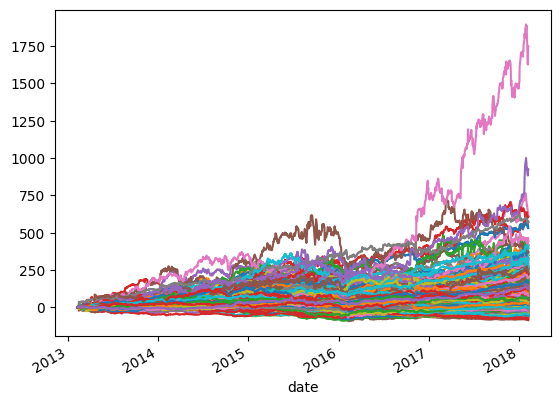

In [126]:
df.groupby('Name')["percent_change"].plot(kind='line')

In [127]:
df["pct"] = df.groupby("Name").close.pct_change()*100

Name
A       Axes(0.125,0.2;0.775x0.68)
AAL     Axes(0.125,0.2;0.775x0.68)
AAP     Axes(0.125,0.2;0.775x0.68)
AAPL    Axes(0.125,0.2;0.775x0.68)
ABBV    Axes(0.125,0.2;0.775x0.68)
                   ...            
XYL     Axes(0.125,0.2;0.775x0.68)
YUM     Axes(0.125,0.2;0.775x0.68)
ZBH     Axes(0.125,0.2;0.775x0.68)
ZION    Axes(0.125,0.2;0.775x0.68)
ZTS     Axes(0.125,0.2;0.775x0.68)
Name: pct, Length: 505, dtype: object

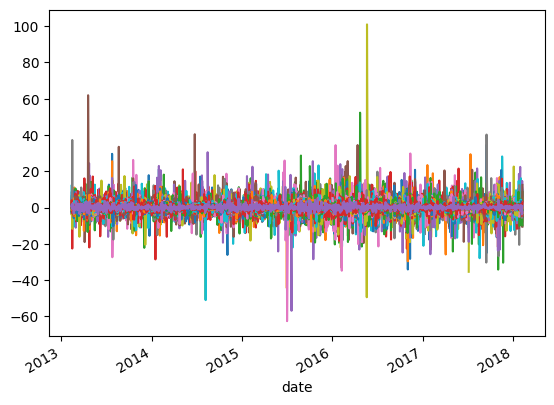

In [128]:
df.groupby('Name')["pct"].plot(kind='line')

Name
AAPL    Axes(0.125,0.2;0.775x0.68)
Name: close, dtype: object

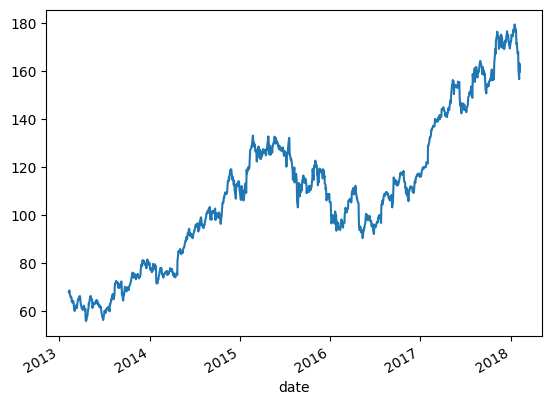

In [129]:
df[df.Name == 'AAPL'].groupby('Name')["close"].plot(kind='line')

Name
AAPL    Axes(0.125,0.2;0.775x0.68)
Name: percent_change, dtype: object

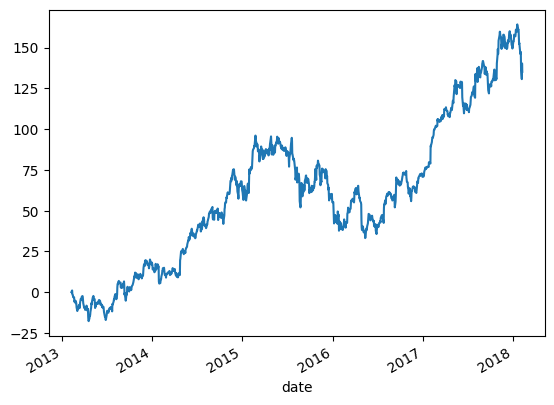

In [130]:
df[df.Name == 'AAPL'].groupby('Name')["percent_change"].plot(kind='line')

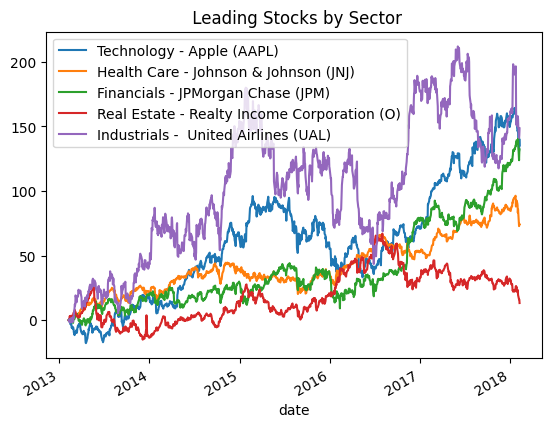

In [131]:
dfSectors = df[(df['Name'] == "JPM") | (df['Name'] == "JNJ") | (df['Name'] == "UAL")| (df['Name'] == "AAPL") | (df['Name'] == "O")]
dfSectors.groupby('Name')["percent_change"].plot(kind='line', title = ' Leading Stocks by Sector')
plt.legend(['Technology - Apple (AAPL)' , 'Health Care - Johnson & Johnson (JNJ)' , 'Financials - JPMorgan Chase (JPM)' , 'Real Estate - Realty Income Corporation (O)' , 'Industrials -  United Airlines (UAL)'])
plt.show()

In [132]:
df['gap'] = df["open"] - df["close"].shift(1)
df.head()

,open,high,low,close,volume,Name,percent_change,pct,gap
date,,,,,,,,,
2013-02-08,45.07,45.35,45.00,45.08,1824755,A,0.000000,NaN,NaN
2013-02-11,45.17,45.18,44.45,44.60,2915405,A,-1.064774,-1.064774,0.09
2013-02-12,44.81,44.95,44.50,44.62,2373731,A,-1.020408,0.044843,0.21
2013-02-13,44.81,45.24,44.68,44.75,2052338,A,-0.732032,0.291349,0.19
2013-02-14,44.72,44.78,44.36,44.58,3826245,A,-1.109139,-0.379888,-0.03


In [133]:
dfAAL = df[df['Name'] == "AAL"]
dfAALchange = dfAAL[(dfAAL['pct'] > 5) | (dfAAL['pct'] < -5)]
dfAALchange.shape

(40, 9)

In [134]:
dfMSFT = df[df['Name'] == "MSFT"]
dfMSFTchange = dfMSFT[(dfMSFT['pct'] > 5) | (dfMSFT['pct'] < -5)]
dfMSFTchange.shape

(12, 9)

In [135]:
dfKO = df[df['Name'] == "KO"]
dfKOchange = dfKO[(dfKO['pct'] > 5) | (dfMSFT['pct'] < -5)]
dfKOchange.shape

(5, 9)

In [136]:
dfMCD = df[df['Name'] == "MCD"]
dfMCDchange = dfMCD[(dfMCD['pct'] > 5) | (dfMCD['pct'] < -5)]
dfMCDchange.shape

(3, 9)

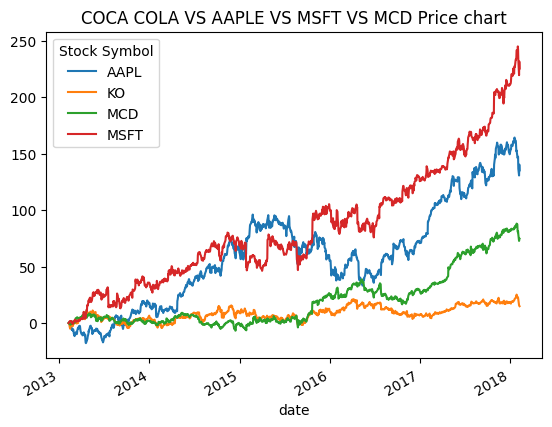

In [137]:
dfKOAAPL = df[(df['Name'] == "AAPL") | (df['Name'] == "KO")  | (df['Name'] == "MSFT") | (df['Name'] == "MCD")]
dfKOAAPL.groupby('Name')["percent_change"].plot(kind='line', title = "COCA COLA VS AAPLE VS MSFT VS MCD Price chart")
plt.legend(title='Stock Symbol')
plt.show()

In [138]:
change = df.groupby('Name')['percent_change'].last()
top5= change.sort_values(ascending=False).head(5)
print(top5)

Name
NVDA    1749.636217
NFLX     923.332096
ALGN     615.948671
EA       608.405296
STZ      572.370487
Name: percent_change, dtype: float64


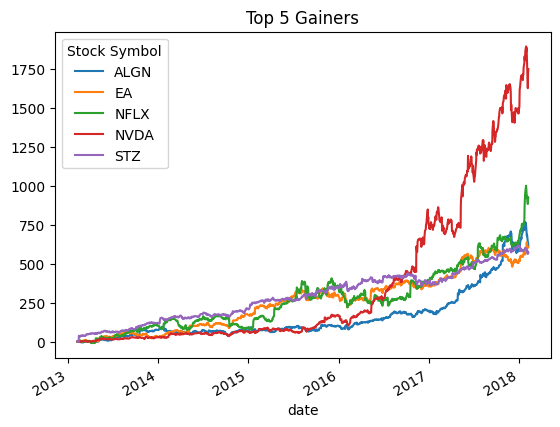

In [139]:
dfLast5 = df[(df['Name'] == "NVDA") | (df['Name'] == "NFLX") | (df['Name'] == "ALGN") | (df['Name'] == "EA") | (df['Name'] == "STZ")] 
dfLast5.groupby('Name')['percent_change'].plot(kind = 'line' , title = 'Top 5 Gainers')
plt.legend(title='Stock Symbol')
plt.show()

In [140]:
change = df.groupby('Name')['percent_change'].last()
last5= change.sort_values(ascending=True).head(5)
print(last5)

Name
CHK     -85.714286
RRC     -81.815662
UA      -72.398910
DISCA   -67.650763
DISCK   -66.021672
Name: percent_change, dtype: float64


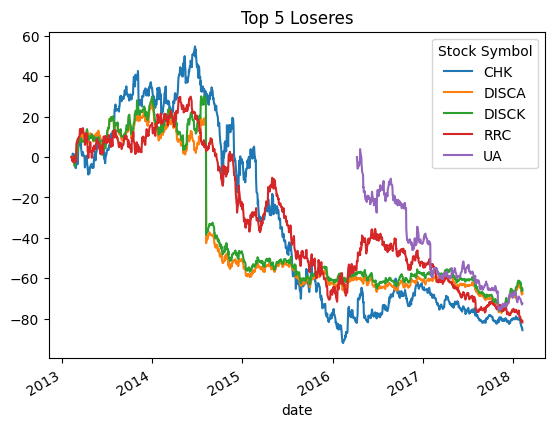

In [141]:
dfLast5 = df[(df['Name'] == "CHK") | (df['Name'] == "RRC") | (df['Name'] == "UA") | (df['Name'] == "DISCA") | (df['Name'] == "DISCK")] 
dfLast5.groupby('Name')['percent_change'].plot(kind = 'line' , title = 'Top 5 Loseres')
plt.legend(title='Stock Symbol')
plt.show()

In [142]:
df.groupby("Name").size()

Name
A       1259
AAL     1259
AAP     1259
AAPL    1259
ABBV    1259
        ... 
XYL     1259
YUM     1259
ZBH     1259
ZION    1259
ZTS     1259
Length: 505, dtype: int64